In [1]:
import torch
x = torch.Tensor([5,6])
y = torch.Tensor([3,4])
print(x * y)

tensor([15., 24.])
/shared-libs/python3.9/py/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
z = torch.zeros(3,5)
z
z.shape

torch.Size([3, 5])

In [3]:
torch.rand(4,5)

tensor([[0.6878, 0.0500, 0.0553, 0.0365, 0.2553],
        [0.2553, 0.5609, 0.6382, 0.3046, 0.4824],
        [0.4702, 0.7078, 0.9081, 0.6306, 0.8431],
        [0.2567, 0.2535, 0.3358, 0.5302, 0.2325]])

In [4]:
import torch
import torchvision
from torchvision import transforms, datasets
train = datasets.MNIST(root = "", train = True, download = True, transform = transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST(root = "", train = False, download = True, transform = transforms.Compose([transforms.ToTensor()]))

In [5]:
trainset = torch.utils.data.DataLoader(train, batch_size = 10, shuffle = True)
testset = torch.utils.data.DataLoader(test, batch_size = 10, shuffle=True)

In [6]:
for data in trainset:
    print(data)
    break 

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [7]:
x, y = data[0][0], data[1][0]
print(y)

tensor(0)


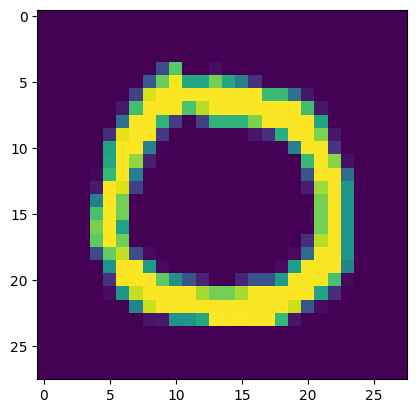

In [8]:
import matplotlib.pyplot as plt
plt.imshow(data[0][0].view(28,28))

In [9]:
#What if the data is unblanced,? Then we will have to perform a counter function 
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}
for data in trainset:
    Xs, Ys = data
    for y in Ys:
        counter_dict[int(y)] += 1

print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [10]:
total = sum(counter_dict.values())
for i in counter_dict:
    print(f"{i}:{counter_dict[i]/total*100}")

0:9.871666666666666
1:11.236666666666666
2:9.93
3:10.218333333333334
4:9.736666666666666
5:9.035
6:9.863333333333333
7:10.441666666666666
8:9.751666666666667
9:9.915000000000001


In [11]:
input_1 = '#Now Let us Biuld a Neural Network'

In [12]:
input_2 = '#Here we start'

In [13]:
import torch.nn as nn 
import torch.nn.functional as F

class Net (nn.Module):
    def __init__(self):
        super().__init__()  # call the parent constructor
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim = 1)


net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [14]:
import torch
x1 = torch.rand(28,28)
x1 = x1.view(-1, 28*28)
output = net(x1)
print(output)

tensor([[-2.3368, -2.3772, -2.2658, -2.3532, -2.1963, -2.2189, -2.2509, -2.2835,
         -2.5024, -2.2761]], grad_fn=<LogSoftmaxBackward0>)


In [15]:
import torch.optim as optim
optimizer = optim.Adam(net.parameters(), lr = 0.001)

EPOCH = 3
for epoch in range(EPOCH):
    for data in trainset:
        X, y, = data
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)
        

tensor(0.1968, grad_fn=<NllLossBackward0>)
tensor(0.0013, grad_fn=<NllLossBackward0>)
tensor(0.0454, grad_fn=<NllLossBackward0>)


In [17]:
correct  = 0
total = 0
with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1, 28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct +=1
                total +=1
print("Accracy:", round(correct/total, 3))



Accracy: 1.0


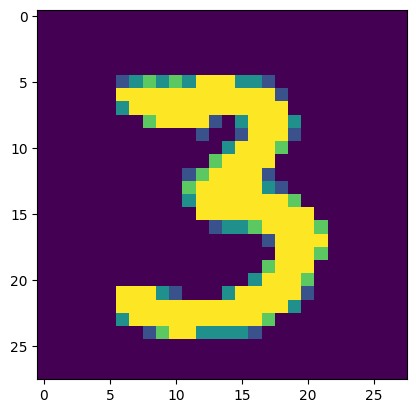

In [26]:
import matplotlib.pyplot as plt
plt.imshow(X[2].view(28,28))
plt.show()

In [27]:
print(torch.argmax(net(X[2].view(-1, 28*28))[0]))

tensor(3)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=778e2fa8-e12c-4f7f-8abe-25bf45a8c1fe' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>